In [1]:
import numpy as np
import pandas as pd
%matplotlib inline 
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import svm
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV, KFold 
from sklearn.metrics import confusion_matrix, classification_report, recall_score, make_scorer, accuracy_score, balanced_accuracy_score, f1_score, precision_score, roc_auc_score

X_train = pd.read_csv('./X_train.csv', index_col=0)
X_test = pd.read_csv('./X_test.csv', index_col=0)
y_train = pd.read_csv('./y_train.csv', index_col=0)
y_test = pd.read_csv('./y_test.csv', index_col=0)

In [2]:
X_train.head()

,Unique_County,Unique_States,Avg_AdmissionDuration,Avg_ClaimDuration,Avg_Total_ClmProcedureCode,Avg_Total_ClmDiagnosisCode,DiagnosisGroupCode_count,Unique_DiagnosisGroupCode,ClmAdmitDiagnosisCode_count,Unique_ClmAdmitDiagnosisCode,...,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,Age_20-30,Age_30-40,Age_40-50,Age_50-60,Age_60-70,Age_70-80,Age_80-90,Age_90-101
0,-0.166326,-0.524122,-0.425291,0.339014,-0.437440,-0.537097,-0.336670,-0.359205,-0.058553,0.010156,...,0.35,0.07,0.00,0.02,0.07,0.15,0.16,0.27,0.27,0.05
1,0.025710,-0.182495,-0.425291,-0.790589,-0.437440,0.187966,-0.336670,-0.359205,-0.341867,-0.431924,...,0.37,0.16,0.00,0.00,0.05,0.00,0.00,0.63,0.26,0.05
2,0.217745,0.159131,-0.425291,-0.173476,-0.437440,-0.283265,-0.336670,-0.359205,-0.310387,-0.376664,...,0.35,0.09,0.04,0.00,0.00,0.04,0.09,0.48,0.35,0.00
3,-0.742434,-0.524122,-0.425291,0.439202,-0.437440,-0.814006,-0.336670,-0.359205,-0.310387,-0.376664,...,0.37,0.11,0.00,0.05,0.05,0.05,0.11,0.39,0.29,0.05
4,0.217745,0.159131,-0.002242,-0.177867,0.223641,-0.182171,0.341722,0.414753,0.130323,0.341716,...,0.22,0.12,0.00,0.03,0.07,0.05,0.15,0.37,0.25,0.08


In [3]:
X_train.shape

(4462, 35)

In [4]:
y_train = pd.Series(y_train['PotentialFraud'], dtype='int32')

In [5]:
y_test = pd.Series(y_test['PotentialFraud'], dtype='int32')

In [6]:
svm= svm.SVC(random_state=1) 

param_grid_svm = [
#     {'C': range(2000, 4500, 300), #opposite of lasso C penalty
#      'kernel': ['poly'], #nonlinear  ~ CURVY/bendy, solves for alpha 
#      'degree': [3, 4, 5]}, #nonlinear - degree of polynomial 
    
    {'C': range(2000, 4500, 300), #how much you want to penalize (higher C means possible overfitting)
     'gamma': np.logspace(-2, -4, 5), # width of the RBF curve, hyperparameter for rbf kernel, larger gamma is the smaller sd is 
     #thin the radial
     'kernel': ['rbf']} # nonlinear, oval/circle (no degree for rbf) RADIAL (default)
]  
#Bo is coef0 

In [7]:
svm_search = GridSearchCV(svm, param_grid_svm, scoring='roc_auc', cv=KFold(shuffle= True, random_state=1), verbose=2, return_train_score=True, n_jobs=-1)
svm_search.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=SVC(random_state=1), n_jobs=-1,
             param_grid=[{'C': range(2000, 4500, 300),
                          'gamma': array([0.01      , 0.00316228, 0.001     , 0.00031623, 0.0001    ]),
                          'kernel': ['rbf']}],
             return_train_score=True, scoring='roc_auc', verbose=2)

In [8]:
print(svm_search.best_params_)
print(svm_search.best_score_)
print(svm_search.score(X_train, y_train))
print(svm_search.score(X_test, y_test))

# Poly:
# {'C': 3800, 'degree': 3, 'kernel': 'poly'}
# 0.9506464831869863
# 0.9941062522133403
# 0.853241618662564

# RBF:
# {'C': 3800, 'gamma': 0.01, 'kernel': 'rbf'}
# 0.9504962160338015
# 0.9808252209376946
# 0.8881131704175463 

{'C': 3800, 'gamma': 0.01, 'kernel': 'rbf'}
0.9504962160338015
0.9808252209376946
0.8881131704175463


In [9]:
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = svm_search.predict(X_test) 
cmSVM = confusion_matrix(y_true, y_pred)
cmSVM

# # Poly
# array([[1376,   95],
#        [  47,  105]], dtype=int64)

# RBF:
# array([[1380,   91],
#        [  49,  103]], dtype=int64)

array([[1380,   91],
       [  49,  103]], dtype=int64)

Text(24.0, 0.5, 'Actual Value')

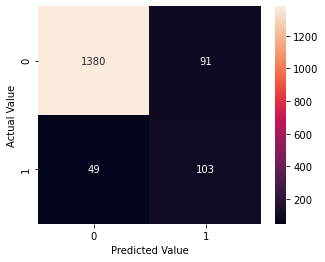

In [11]:
plt.figure(figsize=(5,4))
sns.heatmap(cmSVM, annot=True,fmt='g')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

For our 2nd Nonlinear model - SVM, we choose the kernel rbf which results in Recall of 0.68 and AUC_ROC score 88.81% 

In [13]:
Recall_polly = 105/(105+47)
Recall_polly #0.6907894736842105

Recall_rbf = 103/(103+49)
print(f"The Recall for SVM Polly: {Recall_polly}")
print(f"The Recall for SVM RBF: {Recall_rbf}")

The Recall for SVM Polly: 0.6907894736842105
The Recall for SVM RBF: 0.6776315789473685
